In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from scipy import spatial

In [4]:
train=pd.read_csv('movielenstrain.csv',usecols=[1,2,3])
test=pd.read_csv('movielenstest.csv',usecols=[1,2,3])
holdout=pd.read_csv('movilensholdout.csv',usecols=[1,2,3])

In [5]:
train=train[['userId','movieId','rating']]
test=test[['userId','movieId','rating']]
holdout=holdout[['userId','movieId','rating']]

In [6]:
train.head()

,userId,movieId,rating
0,551.0,301,3.0
1,46.0,1889,5.0
2,586.0,2212,5.0
3,232.0,1143,5.0
4,99.0,820,2.0


In [7]:
holdout.tail()

,userId,movieId,rating
9717,514.0,951,5.0
9718,294.0,1374,4.0
9719,534.0,132,3.0
9720,472.0,4085,3.0
9721,414.0,1692,3.0


In [8]:
import math

In [22]:
rmse=[i for i in range(20,50)]

In [10]:
import time

In [12]:
t1=time.time()
K=[i for i in range(1,121)]
error=[0 for i in range(1,121)]
mae=[0 for i in range(1,121)]
gim=[0 for i in range(1,121)]
gpim=[0 for i in range(1,121)]
count_gim=[0 for i in range(1,121)]
count_gpim=[0 for i in range(1,121)]
#count=[0 for i in range(1,101)]
#err=0
for index,i in test.iterrows():
    predicted=0
    usr=int(i['userId'])
    mov=int(i['movieId'])
    actual=i['rating']
        
    list_A=train[train['movieId']==mov]
    list_mov=train[train['userId']==usr]
    similarity=[]
    corres_rate=[]
    
    for ind2,u in list_A.iterrows():
        c1=[]
        c2=[]
        c_user=int(u['userId'])
        list_curuser=train[train['userId']==c_user]
        xt=pd.merge(list_mov,list_curuser,how='inner',on=['movieId'])
        c1=xt['rating_x']
        c2=xt['rating_y']
        c1_list=c1.tolist()
        c2_list=c2.tolist()
        sim=0
        if len(c1_list)!=0:
            sim=(1-spatial.distance.cosine(c1_list,c2_list))
        
        similarity.append(sim)
        corres_rate.append(u['rating'])
        
    corres_rate = [x for _,x in sorted(zip(similarity,corres_rate),reverse=True)]
    similarity.sort(reverse=True)
   
    #for k in K:
    cs=0
    numc=0
    for k in K:
        
        if (k-1)>=len(similarity):
            for m in range(k,121):
                error[m-1]+=((actual-predicted)**2)
                mae[m-1]+=(abs(actual-predicted))
                if predicted >3:
                    gpim[m-1]+=(abs(actual-predicted))
                    count_gpim[m-1]+=1
                if actual >3:
                    gim[m-1]+=(abs(actual-predicted))
                    count_gim[m-1]+=1
                
                
                
            break
            
            
            
            
        cs+=similarity[k-1]
        numc+=(similarity[k-1]*corres_rate[k-1])
       
        if cs!=0:
            predicted=numc/cs
        error[k-1]+=((actual-predicted)**2)
        mae[k-1]+=(abs(actual-predicted))
        if predicted >3:
            gpim[k-1]+=(abs(actual-predicted))
            count_gpim[k-1]+=1
        if actual >3:
            gim[k-1]+=(abs(actual-predicted))
            count_gim[k-1]+=1
        
    
t2=time.time()        


In [13]:
index

10030

In [2]:
error2=[math.sqrt(i/index) for i in error]

NameError: name 'error' is not defined

In [15]:
mae2=[i/index for i in mae]

In [16]:
gim2=[i/j for i,j in zip(gim,count_gim)]

In [17]:
gpim2=[i/j for i,j in zip(gpim,count_gpim)]

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [3]:
plt.plot(K,error2)

NameError: name 'plt' is not defined

In [21]:
 error2.index(min(error2))

41

In [22]:
min(error2)

1.1554863012060457

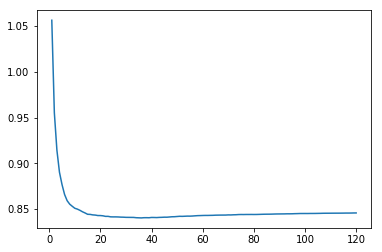

In [23]:
plt.plot(K,mae2)

In [24]:
mae2.index(min(mae2))

35

In [25]:
min(mae2)

0.8401371190657092

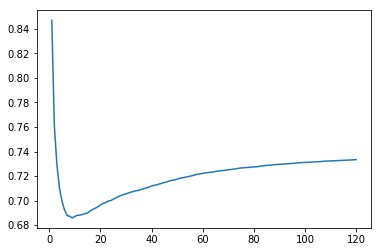

In [26]:
plt.plot(K,gim2)

In [27]:
gim2.index(min(gim2))

8

In [28]:
min(gim2)

0.68584543815279986

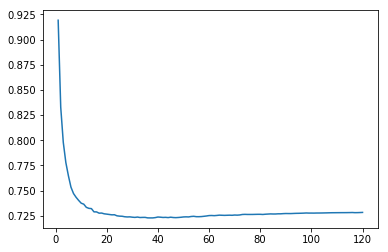

In [29]:
plt.plot(K,gpim2)

In [30]:
gpim2.index(min(gpim2))

36

In [31]:
min(gpim2)

0.72292121479429583

# older parts

In [135]:
print(t2-t1)

2278.3495151996613


In [136]:
rmse=[math.sqrt(i/9722) for i in error]

In [137]:
index

9721

In [138]:
holdout.tail()

,userId,movieId,rating
9717,514.0,951,5.0
9718,294.0,1374,4.0
9719,534.0,132,3.0
9720,472.0,4085,3.0
9721,414.0,1692,3.0


In [118]:
%matplotlib inline
import matplotlib.pyplot as plt

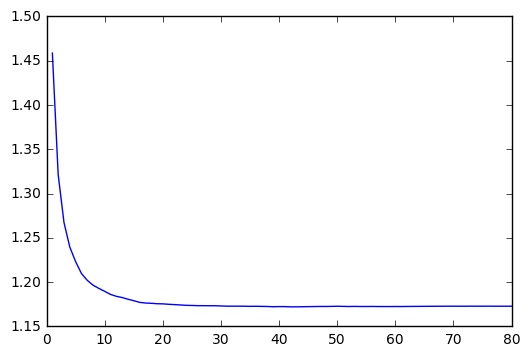

In [139]:
plt.plot(K,rmse)

In [140]:
rmse

[1.458646164074321,
 1.3214051968846898,
 1.2672934831111675,
 1.2395883688897857,
 1.2232184243613184,
 1.2098001596848604,
 1.2020908146799456,
 1.1965828476147984,
 1.192940992936048,
 1.1896544269956342,
 1.1861733149245846,
 1.1840276909224232,
 1.1826469459090831,
 1.180754346628791,
 1.179056115610603,
 1.1772128056631437,
 1.1764509304005706,
 1.176132477533306,
 1.1756661654001352,
 1.1754955794511428,
 1.175000141579528,
 1.174656752144372,
 1.17427458254751,
 1.1738323826758683,
 1.1736823265286527,
 1.1734659917834696,
 1.173450201535955,
 1.1733916808501919,
 1.1733793404214004,
 1.1731312366478548,
 1.1728883726151473,
 1.172907847844935,
 1.172868677188958,
 1.1728398266008289,
 1.1726992175275646,
 1.1727560295841848,
 1.1726586116478477,
 1.172526158970475,
 1.1722524935977907,
 1.1724224518810895,
 1.1723953502798006,
 1.1721497310526459,
 1.1721714436363446,
 1.1722530154088484,
 1.1723784415326062,
 1.1724634193962398,
 1.172576414870065,
 1.1725479129237677,
 1.172

In [130]:
x1=[0.8,0.6,0.5,0.9,0.7]
x2=[4,3,2,1,5]

In [131]:
x2 = [x for _,x in sorted(zip(x1,x2),reverse=True)]
x1.sort(reverse=True)

In [132]:
x1

[0.9, 0.8, 0.7, 0.6, 0.5]

In [133]:
x2

[1, 4, 5, 3, 2]

In [30]:
xt=pd.merge(list_mov,list_curuser,how='inner',on=['movieId'])


In [110]:
K=[i for i in range(1,101)]

In [111]:
K

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [141]:
k_opt=7
t1=time.time()
error=0
for index,i in test.iterrows():
    predicted=0
    usr=int(i['userId'])
    mov=int(i['movieId'])
    actual=i['rating']
        
    list_A=train[train['movieId']==mov]
    list_mov=train[train['userId']==usr]
    similarity=[]
    corres_rate=[]
    
    for ind2,u in list_A.iterrows():
        c1=[]
        c2=[]
        c_user=int(u['userId'])
        list_curuser=train[train['userId']==c_user]
        xt=pd.merge(list_mov,list_curuser,how='inner',on=['movieId'])
        c1=xt['rating_x']
        c2=xt['rating_y']
        c1_list=c1.tolist()
        c2_list=c2.tolist()
        sim=0
        if len(c1_list)!=0:
            sim=(1-spatial.distance.cosine(c1_list,c2_list))
        
        similarity.append(sim)
        corres_rate.append(u['rating'])
        
    corres_rate = [x for _,x in sorted(zip(similarity,corres_rate),reverse=True)]
    similarity.sort(reverse=True)
   
    #for k in K:
    cs=0
    numc=0
    for k in range(0,7):
        if k>=len(similarity):
            break
            
        cs+=similarity[k]
        numc+=(similarity[k]*corres_rate[k])
        #print(k,sm)
    
    if cs!=0:
        predicted=numc/cs
    
    error+=((actual-predicted)**2)
        #count[k-1]+=1
    
t2=time.time()        
#print(math.sqrt(error/c))

In [143]:
test.shape

(10031, 3)

In [144]:
ans=math.sqrt(error/10031)

In [145]:
ans

1.186345101441311